In [3]:
import pandas as pd

# Load transaction and customer data
transactions = pd.read_excel('QVI_transaction_data.xlsx')
customers = pd.read_csv('QVI_purchase_behaviour.csv')

# Preview the data
print("Transactions:")
print(transactions.head())

print("\nCustomers:")
print(customers.head())

Transactions:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Customers:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           

In [25]:
# Check for missing values
print("Missing values in transactions:")
print(transactions.isnull().sum())

print("\nMissing values in customers:")
print(customers.isnull().sum())

# Check data types
print("\nData types in transactions:")
print(transactions.dtypes)

# Convert DATE column to datetime 
transactions['DATE'] = pd.to_datetime(transactions['DATE'])
print(transactions.dtypes) #to check whether date is changed

Missing values in transactions:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in customers:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Data types in transactions:
DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object
DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object


changing the date to readable dates
we already ran so we shouldn't convert again

transactions['DATE'] = pd.to_datetime(transactions['DATE'], origin='1899-12-30', unit='D')

In [22]:
merged = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
print(merged.head()) # Here we merged to tables on loyalty card - left join

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  

In [11]:
# Checking if every transaction has matching customer info
missing_customers = merged[merged['LIFESTAGE'].isnull()]
print(f"Transactions with missing customer info: {len(missing_customers)}")

Transactions with missing customer info: 0


In [14]:
#This line removes rows from the merged DataFrame where the LIFESTAGE column is missing (NaN)
merged.dropna(subset=['LIFESTAGE'], inplace=True) 

In [23]:
# Extract month and day of week
merged['MONTH'] = merged['DATE'].dt.month
merged['DAY_OF_WEEK'] = merged['DATE'].dt.day_name()

# Create a 'UNIT_PRICE' column
merged['UNIT_PRICE'] = merged['TOT_SALES'] / merged['PROD_QTY']

print(merged[['DATE', 'MONTH', 'DAY_OF_WEEK', 'PROD_QTY', 'TOT_SALES', 'UNIT_PRICE']].head())

        DATE  MONTH DAY_OF_WEEK  PROD_QTY  TOT_SALES  UNIT_PRICE
0 2018-10-17     10   Wednesday         2        6.0        3.00
1 2019-05-14      5     Tuesday         3        6.3        2.10
2 2019-05-20      5      Monday         2        2.9        1.45
3 2018-08-17      8      Friday         5       15.0        3.00
4 2018-08-18      8    Saturday         3       13.8        4.60


In [28]:
#checking data types
print(merged.dtypes[['MONTH', 'DAY_OF_WEEK', 'UNIT_PRICE']])

print("Unique months:", merged['MONTH'].unique())
print("Unique days:", merged['DAY_OF_WEEK'].unique())

MONTH            int32
DAY_OF_WEEK     object
UNIT_PRICE     float64
dtype: object
Unique months: [10  5  8  6  9  2  3 11  4  7  1 12]
Unique days: ['Wednesday' 'Tuesday' 'Monday' 'Friday' 'Saturday' 'Sunday' 'Thursday']


In [29]:
# Group by customer segment and sum total sales
segment_sales = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort and preview
segment_sales = segment_sales.sort_values(by='TOT_SALES', ascending=False)
print(segment_sales)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  168363.25
19   YOUNG SINGLES/COUPLES       Mainstream  157621.60
13                RETIREES       Mainstream  155677.05
15          YOUNG FAMILIES           Budget  139345.85
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
7           OLDER FAMILIES       Mainstream  103445.55
14                RETIREES          Premium   97646.05
16          YOUNG FAMILIES       Mainstream   92788.75
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
17          YOUNG FAMILIES          Premium   84025.50
8           OLDER FAMILIES          Premium   81958.40
18   YOUNG SINGLES/COUPLES           Budget   61141.60
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
20   YOUNG SINGLES/COUPLES          Premium   41642.10
0   MIDAGE

In [31]:
# Calculate average spend per transaction
segment_avg = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
segment_avg.rename(columns={'TOT_SALES': 'AVG_SPEND'}, inplace=True)
segment_avg = segment_avg.sort_values(by='AVG_SPEND', ascending=False)
print(segment_avg)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_SPEND
1   MIDAGE SINGLES/COUPLES       Mainstream   7.647284
19   YOUNG SINGLES/COUPLES       Mainstream   7.558339
14                RETIREES          Premium   7.456174
11   OLDER SINGLES/COUPLES          Premium   7.449766
12                RETIREES           Budget   7.443445
9    OLDER SINGLES/COUPLES           Budget   7.430315
8           OLDER FAMILIES          Premium   7.322945
4             NEW FAMILIES       Mainstream   7.317806
3             NEW FAMILIES           Budget   7.297321
15          YOUNG FAMILIES           Budget   7.287201
10   OLDER SINGLES/COUPLES       Mainstream   7.282116
6           OLDER FAMILIES           Budget   7.269570
17          YOUNG FAMILIES          Premium   7.266756
7           OLDER FAMILIES       Mainstream   7.262395
13                RETIREES       Mainstream   7.252262
5             NEW FAMILIES          Premium   7.231655
16          YOUNG FAMILIES       Mainstream   7.189025
2   MIDAGE

In [32]:
# Top 10 products by total sales
top_products = merged.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(10)
print(top_products)

                                   PROD_NAME  TOT_SALES
11          Dorito Corn Chp     Supreme 380g    40352.0
86    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
77  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
33    Kettle Mozzarella   Basil & Pesto 175g    34457.4
76         Smiths Crinkle      Original 330g    34302.6
6                       Cheezels Cheese 330g    34296.9
12          Doritos Cheese      Supreme 330g    33390.6
39   Kettle Sweet Chilli And Sour Cream 175g    33031.8
34                      Kettle Original 175g    32740.2
35      Kettle Sea Salt     And Vinegar 175g    32589.0


In [37]:
# Extract numeric pack size from PROD_NAME
merged['PACK_SIZE'] = merged['PROD_NAME'].str.extract(r'(\d+)\s?g').astype(float)

# Brand is usually the first word in PROD_NAME
merged['BRAND'] = merged['PROD_NAME'].str.split().str[0]

#Spend by Pack Size
pack_spend = merged.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)
print(pack_spend)
print('\n')

#Spend by Brand
brand_spend = merged.groupby('BRAND')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)
print(brand_spend)

    PACK_SIZE  TOT_SALES
10      175.0   477112.4
6       150.0   296609.7
4       134.0   177655.5
2       110.0   162765.4
9       170.0   146673.0
19      330.0   136794.3
18      300.0   113330.6
8       165.0   101360.6
20      380.0    76719.6
17      270.0    55425.4
16      250.0    26096.7
5       135.0    26090.4
14      210.0    21700.8
13      200.0    16007.5
12      190.0    14412.9
7       160.0    10647.6
1        90.0     9676.4
11      180.0     8568.4
0        70.0     6852.0
15      220.0     6831.0
3       125.0     5733.0


         BRAND  TOT_SALES
12      Kettle   390239.8
20      Smiths   210076.8
6      Doritos   201538.9
16    Pringles   177655.5
15         Old    90785.1
23       Thins    88852.5
25    Twisties    81522.1
24    Tostitos    79789.6
10   Infuzions    76247.6
4         Cobs    70569.8
17         RRD    64954.5
26    Tyrrells    51647.4
8        Grain    43048.8
5       Dorito    40352.0
3     Cheezels    40029.9
27          WW    35889.5
14    

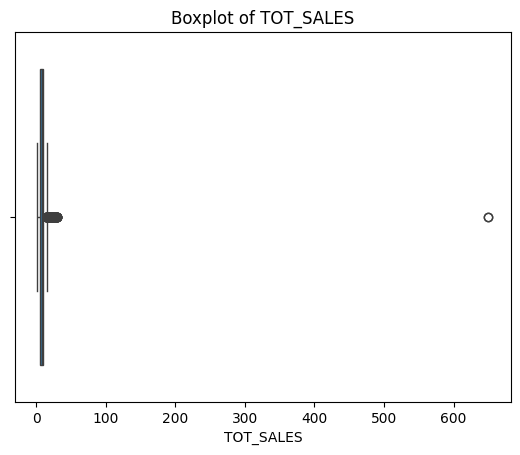

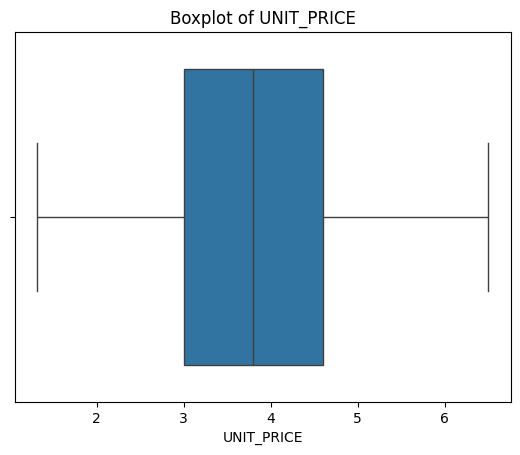

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# TOT_SALES
sns.boxplot(x=merged['TOT_SALES'])
plt.title('Boxplot of TOT_SALES')
plt.show()

# UNIT_PRICE
sns.boxplot(x=merged['UNIT_PRICE'])
plt.title('Boxplot of UNIT_PRICE')
plt.show()

In [39]:
# Check high-end values
print(merged['TOT_SALES'].describe())
print(merged['UNIT_PRICE'].describe())

# Optional: filter out extreme outliers
merged = merged[merged['TOT_SALES'] < 100]  # adjust threshold based on boxplot
merged = merged[merged['UNIT_PRICE'] < 10]

count    264836.000000
mean          7.304200
std           3.083226
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: TOT_SALES, dtype: float64
count    264836.000000
mean          3.824624
std           1.109523
min           1.320000
25%           3.000000
50%           3.800000
75%           4.600000
max           6.500000
Name: UNIT_PRICE, dtype: float64


In [40]:
# Group and rank products by segment
segment_products = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()

# Rank within each segment
segment_products['RANK'] = segment_products.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].rank(ascending=False)

# Filter top 3 per segment
top3_segment_products = segment_products[segment_products['RANK'] <= 3]
print(top3_segment_products.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'RANK']))

                   LIFESTAGE PREMIUM_CUSTOMER  \
11    MIDAGE SINGLES/COUPLES           Budget   
33    MIDAGE SINGLES/COUPLES           Budget   
76    MIDAGE SINGLES/COUPLES           Budget   
191   MIDAGE SINGLES/COUPLES       Mainstream   
120   MIDAGE SINGLES/COUPLES       Mainstream   
...                      ...              ...   
2252   YOUNG SINGLES/COUPLES       Mainstream   
2199   YOUNG SINGLES/COUPLES       Mainstream   
2291   YOUNG SINGLES/COUPLES          Premium   
2366   YOUNG SINGLES/COUPLES          Premium   
2313   YOUNG SINGLES/COUPLES          Premium   

                                     PROD_NAME  TOT_SALES  RANK  
11            Dorito Corn Chp     Supreme 380g      734.5   1.0  
33      Kettle Mozzarella   Basil & Pesto 175g      675.0   2.0  
76           Smiths Crinkle      Original 330g      632.7   3.0  
191   Smiths Crinkle Chips Salt & Vinegar 330g     2103.3   1.0  
120                       Cheezels Cheese 330g     2012.1   2.0  
...            

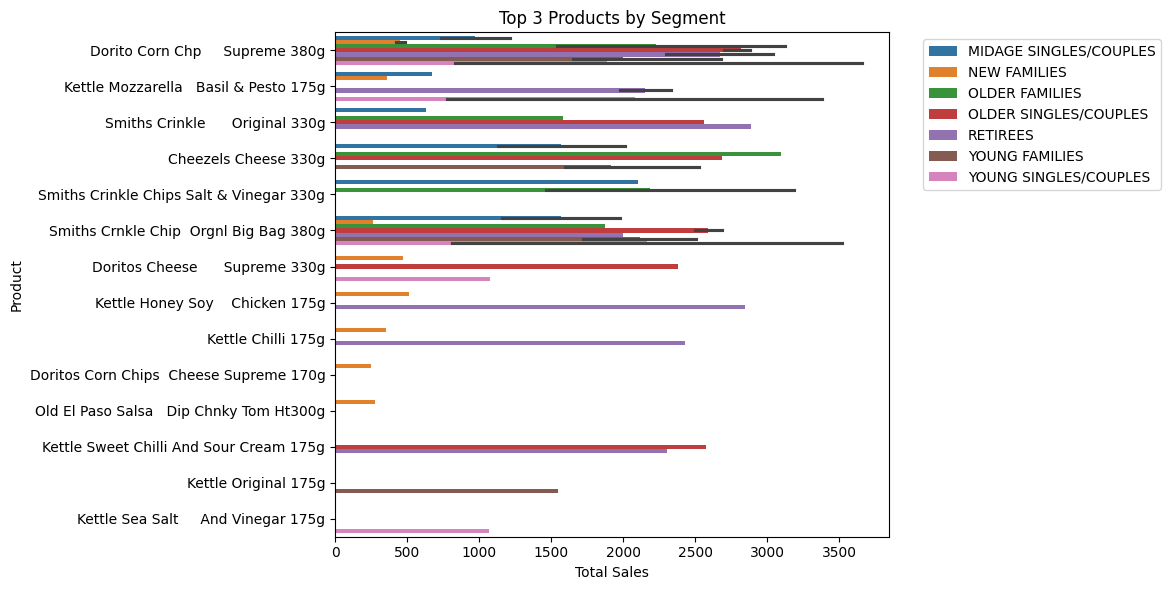

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top3_segment_products, x='TOT_SALES', y='PROD_NAME', hue='LIFESTAGE')
plt.title('Top 3 Products by Segment')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Strategic Recommendation for Julia

Based on our analysis, we recommend focusing promotional efforts on high-value segments such as **Older Families (Budget)** and **Midage Singles/Couples (Mainstream)**. These groups show strong total and per-transaction spend, especially on brands like **Kettle**, **Smiths**, and **Doritos**.

The 175g and 150g pack sizes dominate overall sales, suggesting that smaller packs are preferred across most segments. However, larger packs (330g–380g) show potential among older families and premium buyers — ideal for bulk promotions or family bundles.

We suggest targeted promotions for **Kettle 175g** across mainstream and budget segments, and bundled offers for **Doritos and Smiths large packs** aimed at older families. Additionally, consider trial-size or discount strategies for younger budget-conscious segments to boost engagement.

In [4]:
merged = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
merged.dropna(subset=['LIFESTAGE'], inplace=True)

In [5]:
segment_sales = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [7]:
segment_sales['SEGMENT'] = segment_sales['LIFESTAGE'] + ' - ' + segment_sales['PREMIUM_CUSTOMER']

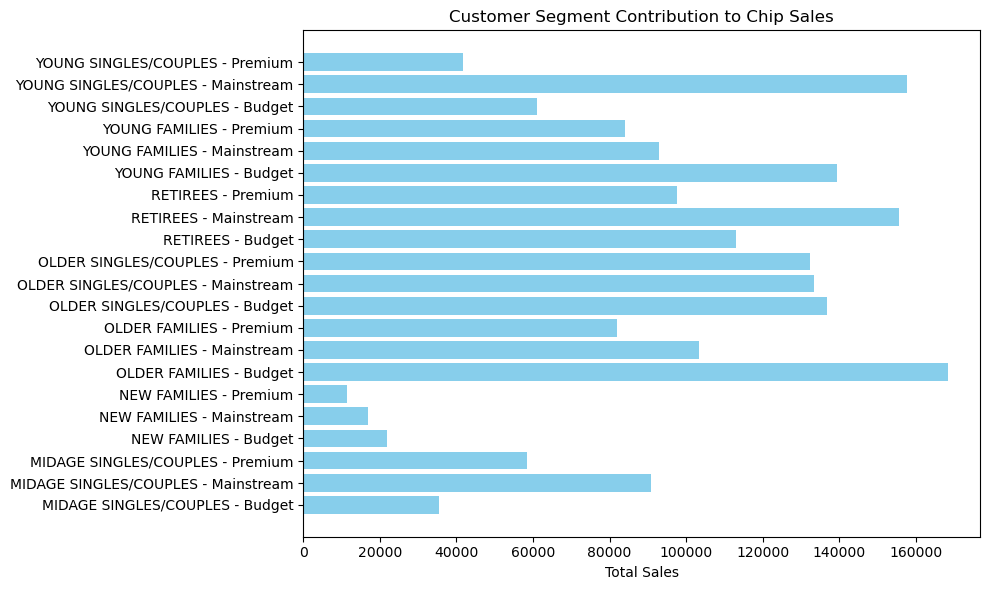

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(segment_sales['SEGMENT'], segment_sales['TOT_SALES'], color='skyblue')
plt.xlabel('Total Sales')
plt.title('Customer Segment Contribution to Chip Sales')
plt.tight_layout()
plt.show()

In [13]:
merged = pd.merge(transactions, customers, on='LYLTY_CARD_NBR', how='left')
merged.dropna(subset=['LIFESTAGE', 'PREMIUM_CUSTOMER'], inplace=True)

In [14]:
segment_counts = merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
segment_counts.rename(columns={'LYLTY_CARD_NBR': 'CUSTOMER_COUNT'}, inplace=True)

In [15]:
pivot = segment_counts.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='CUSTOMER_COUNT').fillna(0)
pivot_prop = pivot.div(pivot.sum(axis=1), axis=0)

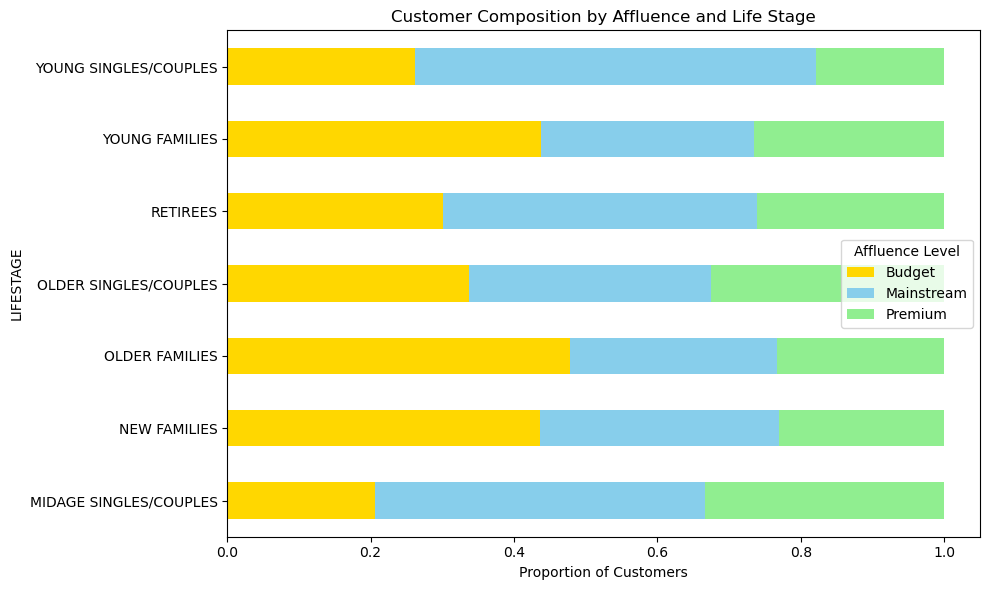

In [16]:
pivot_prop.plot(kind='barh', stacked=True, figsize=(10, 6), color=['gold', 'skyblue', 'lightgreen'])

plt.xlabel('Proportion of Customers')
plt.title('Customer Composition by Affluence and Life Stage')
plt.legend(title='Affluence Level')
plt.tight_layout()
plt.show()